# Linear Regresssion Assignment
## Bike Sharing Case Study
### Problem Statement :

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1. Which variables are significant in predicting the demand for shared bikes. 
    2. How well those variables describe the bike demands

Based on the business problem, we can use Linear Regression algorithm to predict which are significant variables impacting demand

### Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Read Data - To load data from day.csv
bikeshare = pd.read_csv("/Users/vamsi/Desktop/Upgrad/Linear Regression/Assignment - Bike Case Study/day.csv")

In [4]:
# Inspect Data - To display top 5 rows in data frame
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Analyze the various aspects of the bikeshare dataframe

In [5]:
# Inspect dataframe's columns, shapes, variable types etc.
print(bikeshare.shape)
print(bikeshare.columns)
print(bikeshare.dtypes)

(730, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [6]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Understanding of Data frame

As all columns are non-null, there are no nulls in any columns in the dataframe. Also based on data frame analysis we can find below observations :

1. instant, Dteday columns can be dropped as instant is a seq number and dteday is a daily date column which don't have any value in data analysis
2. As we know that cnt is sum of casual and registered, we can drop these columns
3. cnt will be our target dependent variable (y) which is to be predicted
4. season, yr, mnth, holiday, weekday, workingday, weathersit - These are the categorical columns in the dataframe
5. temp, atemp, hum, windspeed - These are continuous columns in the data frame

In [7]:
# To get statistical overview of the dataset
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# To drop the unnecessary columns in dataframe
bikeshare.drop(['instant', 'dteday', 'casual', 'registered'],axis = 1, inplace = True)

In [9]:
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
print(bikeshare.shape)
print(bikeshare.columns)
print(bikeshare.dtypes)

(730, 12)
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


##### Datatype Conversion
To conver data type for season,mnth,weekday,weathersit as these are categorical variables. For all these columns we need to map string data first and then create dummy variables as these have different levels of data

yr, holiday, workingday - These columns are also categorical but these have binary values so no need to change these datatype as these can be used asis for analysis.


In [11]:
bikeshare[['season','mnth','weekday','weathersit']] = bikeshare[['season','mnth','weekday','weathersit']].astype(str)
bikeshare.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [12]:
# To map season column data from numerical to string values as this is categorical data
season_map = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
bikeshare['season'] = bikeshare['season'].map(season_map)

In [13]:
# To map mnth column data from numerical to string values as this is categorical data
mnth_map = {'1':'January', '2':'February', '3':'March', '4':'April', '5':'May', '6':'June', '7':'July', '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'}
bikeshare['mnth'] = bikeshare['mnth'].map(mnth_map)

In [14]:
# To map weekday column data from numerical to string values as this is categorical data
weekday_map = {'0':'Sunday', '1':'Monday', '2':'Tuesday', '3':'Wednesday', '4':'Thursday', '5':'Friday', '6':'Saturday'}
bikeshare['weekday'] = bikeshare['weekday'].map(weekday_map)

In [15]:
# To map weathersit column data from numerical to string values as this is categorical data
weathersit_map = {'1':'Clear', '2':'Mist', '3':'Light_Snow', '4':'Heavy_Rain'}
bikeshare['weathersit'] = bikeshare['weathersit'].map(weathersit_map)

In [16]:
# Rename yr column to yr_2019
# Rename columns to years
bikeshare.rename(columns = {'yr': 'yr_2019'}, inplace = True)

In [17]:
# Data after mapping
bikeshare.head()

,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualising the Data - Exploratory Data Analysis (EDA)

Data visualisation is mostly for understanding the data. Below are main observations for this step :
- If any multicollinearity between variables
- To see what independent variables are having strong association with dependent variable

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

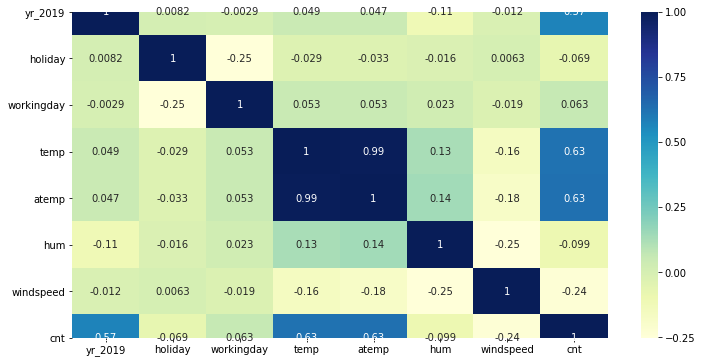

In [19]:
# Correlation between variables
plt.figure(figsize = (12, 6))
sns.heatmap(bikeshare.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see that cnt is correlated with temp & atemp. temp and atemp are highly correlated to each other.

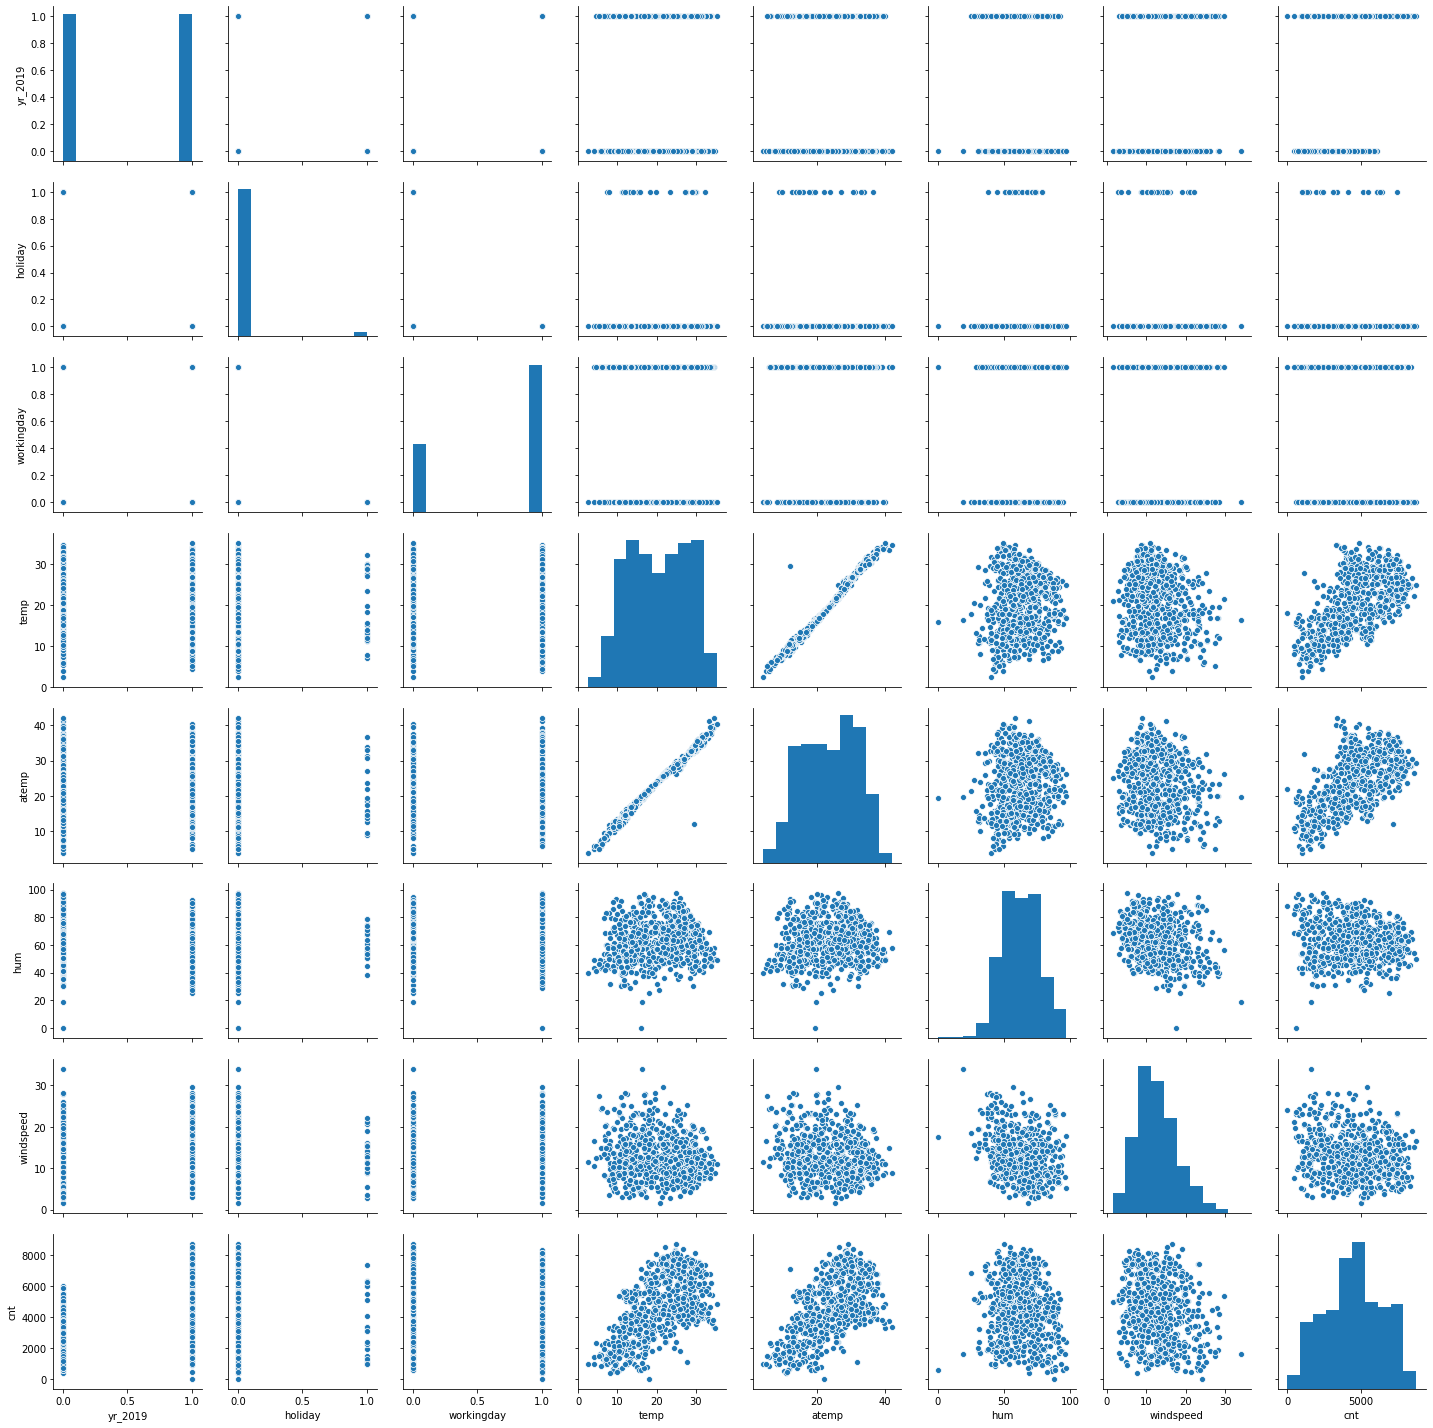

In [20]:
# Visualise numeric variable using pairplot
sns.pairplot(bikeshare)
plt.show()

Some of the observations based on above charts :

    1. We can see that temp and atemp are having association with dependent variable cnt
    2. We have year, holiday and workingday - All these are categorical variables but as these have binary                values these are plotted here
    3. We can see atemp & temp are very much linearly correlated. So we drop atemp variable for our analysis.

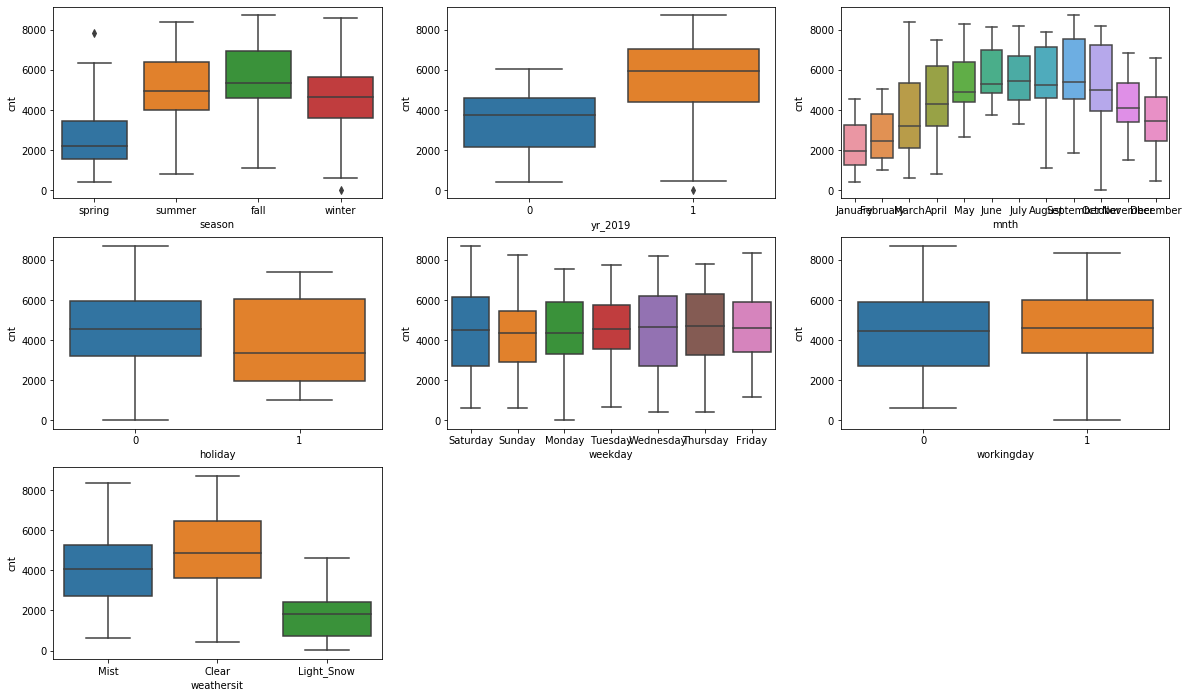

In [21]:
# Visualise categorical variable using boxplot
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr_2019', y = 'cnt', data = bikeshare)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeshare)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare)
plt.show()

Observation based on above charts :
    1. Season - spring has low rental count when compared with other seasons. As rains are more in spring this            could be one of the reason for low rental counts
    2. yr_2019 - 0 corresponds to 2018, 1 corrsponds to 2019. 2019 has huge rental count when compared to 2018
    3. mnth - The rental count is huge between may to oct - which are summers and fall and have good weather for          bike rentals
    4. holiday - Average of non holiday is more when compared to average of holiday rentals
    5. weekday - Data is evenly spread for all days, but we can see sat/wed corresponds to more rentals
    6. workingday - This has even spread of data betwen working & non-working day
    7. weathersit - We can see data only for 3 variables, heavy_rain don't have any data as mostly bikers don't            rent on rainy days. Also light_snow has low rentals. We can see clear weather has huge rentals as bikers            prefer to ride on clear weather days.

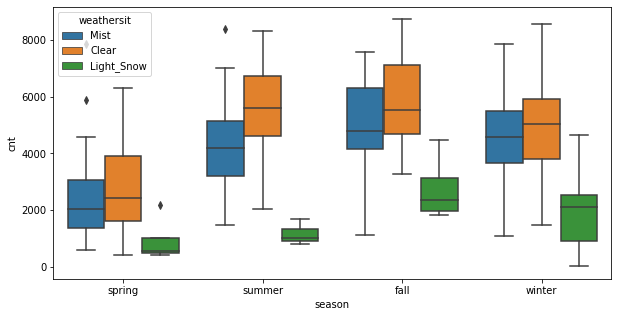

In [22]:
# More analysis on categorical data
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bikeshare)
plt.show()

We can see that winter has huge snowfall and so the rental counts are low. Summer, spring and fall corresponds to clear, mist weather and has high rental counts

### Preparing the Data
We have season,mnth,weekday,weathersit columns where we need to create dummy variables. All these columns have categorical data and have different levels.

In [23]:
# Dummy variables creation for season
season_dummy = pd.get_dummies(bikeshare['season'],drop_first = True)
bikeshare = pd.concat([bikeshare, season_dummy], axis = 1)
bikeshare.drop(['season'], axis = 1, inplace = True)
bikeshare.head()

,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [24]:
# Dummy variables creation for mnth
mnth_dummy = pd.get_dummies(bikeshare['mnth'],drop_first = True)
bikeshare = pd.concat([bikeshare, mnth_dummy], axis = 1)
bikeshare.drop(['mnth'], axis = 1, inplace = True)
bikeshare.head()

,yr_2019,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [25]:
# Dummy variables creation for weekday
weekday_dummy = pd.get_dummies(bikeshare['weekday'],drop_first = True)
bikeshare = pd.concat([bikeshare, weekday_dummy], axis = 1)
bikeshare.drop(['weekday'], axis = 1, inplace = True)
bikeshare.head()

,yr_2019,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# Dummy variables creation for weathersit
weathersit_dummy = pd.get_dummies(bikeshare['weathersit'],drop_first = True)
bikeshare = pd.concat([bikeshare, weathersit_dummy], axis = 1)
bikeshare.drop(['weathersit'], axis = 1, inplace = True)
bikeshare.head()

,yr_2019,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# dropping atemp column as temp & atemp are very highly correlated.
bikeshare.drop(['atemp'], axis = 1, inplace = True)

In [28]:
# Inspect dataframe's columns, shapes, variable types etc. - Final dataframe before data split between train/test
print(bikeshare.shape)
print(bikeshare.columns)
print(bikeshare.dtypes)

(730, 29)
Index(['yr_2019', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light_Snow', 'Mist'],
      dtype='object')
yr_2019         int64
holiday         int64
workingday      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
spring          uint8
summer          uint8
winter          uint8
August          uint8
December        uint8
February        uint8
January         uint8
July            uint8
June            uint8
March           uint8
May             uint8
November        uint8
October         uint8
September       uint8
Monday          uint8
Saturday        uint8
Sunday          uint8
Thursday        uint8
Tuesday         uint8
Wednesday       uint8
Light_Snow      uint8
Mist        

### Splitting the Data into Training and Testing Sets

As part of regression, we need to split the data set into train and test. This is to make sure that our model is trained on train data set and the final model is tested on test data set. Generally we split 70% of data to train the model and remaining 30% of data for test.

In [29]:
# Data split between train and test 
from sklearn.model_selection import train_test_split
np.random.seed(0)
bikeshare_train, bikeshare_test = train_test_split(bikeshare, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
# Shape of train data set -- As we have total of 730 records, 70% of data corrsponds to 510 records
bikeshare_train.shape

(510, 29)

In [31]:
# Shape of test data set -- As we have total of 730 records, 30% of data corrsponds to 219 records
bikeshare_test.shape

(219, 29)

### Rescaling the features

Scaling makes the variables to be comparable on the same scale. If we don't scale, some of the coefficients will be very large or very small and this will hamper the model evaluation. We have standardisation and min-max scaling techniques.

We will use Min-Max scaling for this assignment.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
# We will apply scaler() to all the columns except the 'yes-no' and 'dummy' variable columns
# We will be applying scaling to - temp, hum, windspeed, cnt columns

to_scale_variables = ['temp', 'hum', 'windspeed', 'cnt']
bikeshare_train[to_scale_variables] = scaler.fit_transform(bikeshare_train[to_scale_variables])

In [35]:
bikeshare_train.head()

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [36]:
bikeshare_train.describe()

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


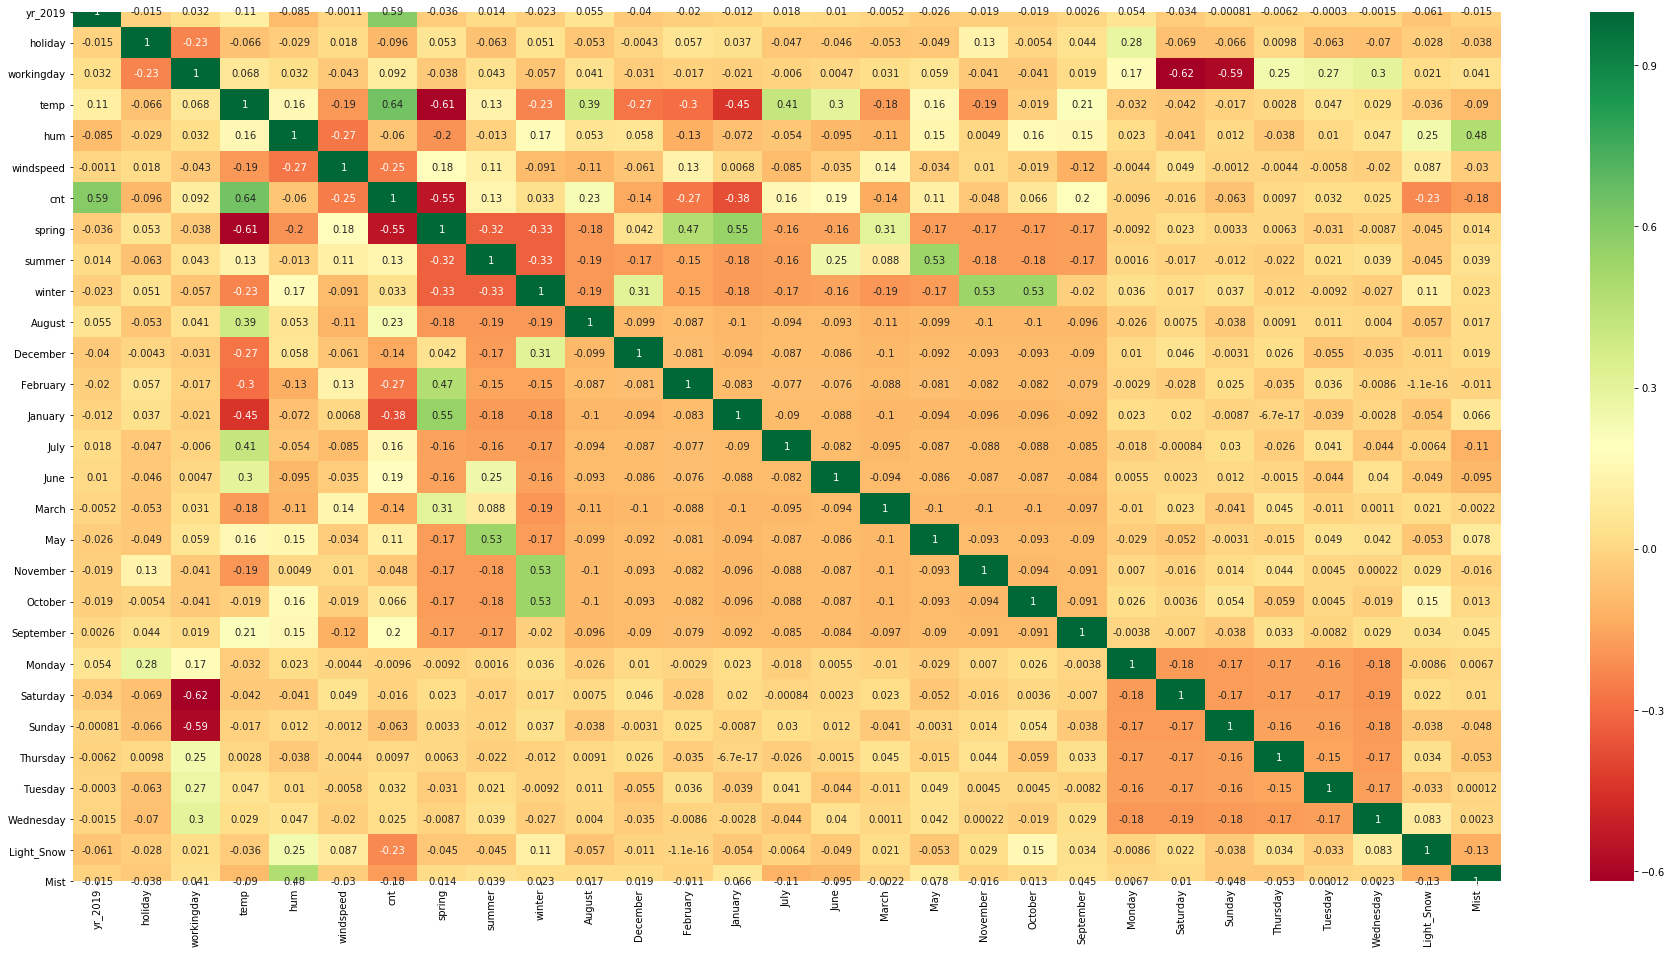

In [37]:
# To check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (32, 16))
sns.heatmap(bikeshare_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

We can see cnt is more correlated with yr and temp. We can visualize cnt vs temp through scatter plot

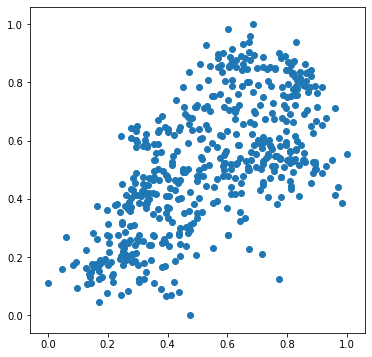

In [38]:
plt.figure(figsize=[6,6])
plt.scatter(bikeshare_train.temp, bikeshare_train.cnt)
plt.show()

##### Dividing train data set into X and Y sets for the model building

In [39]:
y_train = bikeshare_train.pop('cnt')
X_train = bikeshare_train

### Building a Linear Regression Model

We use a combined approach of RFE + Manual to build our Linear Regression Model

Recursive Feature Elimination (RFE) - This is an automated approach for feature selection. If we have more than 10-15 variables in the dataset, it is advisable to use RFE to identify the key variables

From the variables identified through RFE, we then use manual approach to have our best fit model

In [40]:
# Importing RFE and LinearRegression -- for RFE we need to import from SciKit Learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [41]:
# To run RFE to get 15 output variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [42]:
# To get RFE output which gives all the columns in dataset with their ranking and support value with True/False for filtering
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr_2019', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 7),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 5),
 ('November', False, 2),
 ('October', False, 10),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [43]:
# To get the list of columns which are required for further modelling where rfe.support is True/rfe.ranking =1
col = X_train.columns[rfe.support_]
col

Index(['yr_2019', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'January', 'July', 'September',
       'Saturday', 'Light_Snow', 'Mist'],
      dtype='object')

In [44]:
# List of columns which are ignored by the RFE in feature selection step - Remaining 13 columns
X_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'June', 'March', 'May', 'November',
       'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

#### Model Building using Statsmodel
From initial 28 features, through automated RFE approach we bought them to 15 features. Now to identify the best model fit we will do manual approach through statsmodel and filter unnecessary features

##### Model - 1

In [45]:
# To create a dataframe with RFE selected features
X_train_rfe = X_train[col]

In [46]:
# For statsmodel we need to add constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
# To run the Linear regression model
lm_1 = sm.OLS(y_train, X_train_rfe).fit()

In [48]:
# Summary of the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.31e-191
Time:                        23:38:58   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

##### Model - 1 Observations :
From the above stats, we can see that both r-square and adjusted r-square are nearly 84.5% which is statistically significant and very high that means about 84.5% of variance in cnt is explained by above 15 variables.

Also the prob(F-statistic) which is - 2.31e-191 is very low and that means the high r-square is not by chance and the model fit is statistically significant.

We will calculate Variance Inflation Factor (VIF) in next steps. Based on p-value & VIF we will proceed further in feature selection

In [49]:
# To calculate VIF we need to remove constant and calculate
X_train_vif = X_train_rfe.drop(['const'], axis=1)
X_train_vif.columns

Index(['yr_2019', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'January', 'July', 'September',
       'Saturday', 'Light_Snow', 'Mist'],
      dtype='object')

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,Mist,2.29
0,yr_2019,2.09
12,Saturday,1.98


Based on above p-values and VIF, we can see that p-value for January is 0.048 which is less than 0.05 permissible value, but comparing with other features p-values it is high.

The VIF for hum and temp are very high when compared to other features. 

So based on my understanding, hum & temp are key factors for bike ride when compared to January month even if VIF is low.
As 1st step, let's remove January variable and then rebuild the model

##### Model - 2

In [51]:
# Remove January column
X_train_M2 = X_train_vif.drop(["January"], axis = 1)

In [52]:
# Add constant for statsmodels
X_train_M2 = sm.add_constant(X_train_M2)

In [53]:
# To run Linear Regression model
lm_2 = sm.OLS(y_train, X_train_M2).fit()

In [54]:
# Summary of the linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.13e-191
Time:                        23:39:04   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2394      0.036      6.696      0.0

##### Model - 2 Observations :

We can see that there is not much decrease in both r-square and adjusted r-square when compared to previous model. Both are nearly 84.5% which tells that there is not much impact on the model after dropping "January" column.

Also the prob(F-statistic) which is 1.13e-191 is very low and that means the high r-square is not by chance and the model fit is statistically significant.

Now we will see VIF and see how removal of "January" column impacted the correlation between other variables.

In [55]:
# To calculate VIF we need to remove constant and calculate
X_train_vif = X_train_M2.drop(['const'], axis=1)
X_train_vif.columns

Index(['yr_2019', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'July', 'September', 'Saturday',
       'Light_Snow', 'Mist'],
      dtype='object')

In [56]:
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
13,Mist,2.28
0,yr_2019,2.08
11,Saturday,1.97


We can see that p-values are almost 0 for most of the variables except holiday. But i feel holiday is one of the key feature as this may impact on bike rentals. Also the p-value for holiday is 0.028 which is very less than permissible 0.05 value. So i will keep holiday variable in my model for now.

We can see that VIF for hum is 28.49 which is very high when compared to general permissible value (less than 5).
So let's remove hum variable and then rebuild our model.

##### Model - 3

In [57]:
# Remove hum column
X_train_M3 = X_train_vif.drop(["hum"], axis = 1)

In [58]:
# Add constant for statsmodels
X_train_M3 = sm.add_constant(X_train_M3)

In [59]:
# To run Linear Regression model
lm_3 = sm.OLS(y_train, X_train_M3).fit()

In [60]:
# Summary of the linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.73e-189
Time:                        23:39:09   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1577      0.031      5.134      0.0

##### Model - 3 Observations :

We can see that there is not much decrease in both r-square and adjusted r-square when compared to previous model. Both are nearly 84% which tells that there is not much impact on the model after dropping "hum" column. There is only decrease of 0.005 which is very low.

Also the prob(F-statistic) which is 5.73e-189 is very low and that means the high r-square is not by chance and the model fit is statistically significant.

Now we will see VIF and see how removal of "hum" column impacted the correlation between other variables.

In [61]:
# To calculate VIF we need to remove constant and calculate
X_train_vif = X_train_M3.drop(['const'], axis=1)
X_train_vif.columns

Index(['yr_2019', 'holiday', 'workingday', 'temp', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'September', 'Saturday', 'Light_Snow',
       'Mist'],
      dtype='object')

In [62]:
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.32
0,yr_2019,2.07
7,winter,1.99
10,Saturday,1.96
8,July,1.58
12,Mist,1.56


We can see that p-value of holiday increased to 0.038. It's still less than the permissible value of 0.05.
After removal of "hum" variable, we can see the VIF for temp is decreased to 6.97 from 16.97 and is more than permissible value (less than 5).

So in between holiday which has p-value of 0.038 and temp which has VIF of 6.97, I will go with removing of holiday in next step. When compared between business relevance for holiday and temp, I feel temp has more important as most of the bike rentals depends on temprature when compared to holiday.

##### Model - 4

In [63]:
# Remove holiday column
X_train_M4 = X_train_vif.drop(["holiday"], axis = 1)

In [64]:
# Add constant for statsmodels
X_train_M4 = sm.add_constant(X_train_M4)

In [65]:
# To run Linear Regression model
lm_4 = sm.OLS(y_train, X_train_M4).fit()

In [66]:
# Summary of the linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.28e-189
Time:                        23:39:14   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.031      4.886      0.0

##### Model - 4 Observations :

We can see that there is not much decrease in both r-square and adjusted r-square when compared to previous model. Both are nearly 84% which tells that there is not much impact on the model after dropping "holiday" column. There is only decrease of 0.002 which is very low.

Also the prob(F-statistic) which is 3.28e-189 is very low and that means the high r-square is not by chance and the model fit is statistically significant.

Now we will see VIF and see how removal of "holiday" column impacted the correlation between other variables.

In [67]:
# To calculate VIF we need to remove constant and calculate
X_train_vif = X_train_M4.drop(['const'], axis=1)
X_train_vif.columns

Index(['yr_2019', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'July', 'September', 'Saturday', 'Light_Snow', 'Mist'],
      dtype='object')

In [68]:
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,yr_2019,2.07
6,winter,1.92
9,Saturday,1.83
7,July,1.58
11,Mist,1.56


We can see that p-values for all features is almost equal to 0. Only July has p-value of 0.008 which is very less than 0.05, so this fine.
Now, when we see the VIF, we can see that temp has 6.73 which is more than permissible value of 5. But i feel that temp is a key variable. I will try removing the "workingday" variable and see the model



##### Model - 5

In [69]:
# Remove holiday column
X_train_M5 = X_train_vif.drop(["workingday"], axis = 1)

In [70]:
# Add constant for statsmodels
X_train_M5 = sm.add_constant(X_train_M5)

In [71]:
# To run Linear Regression model
lm_5 = sm.OLS(y_train, X_train_M5).fit()

In [72]:
# Summary of the linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.37e-185
Time:                        23:39:18   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     498   BIC:                            -913.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1937      0.030      6.478      0.0

##### Model - 5 Observations :

We can see that there is not much decrease in both r-square and adjusted r-square when compared to previous model. Both are nearly 83% which tells that there is not much impact on the model after dropping "workingday" column. There is only decrease of 0.8% which is fine.

Also the prob(F-statistic) which is 3.37e-185 is very low and that means the high r-square is not by chance and the model fit is statistically significant.

Now we will see VIF and see how removal of "workingday" column impacted the correlation between other variables.

In [73]:
# To calculate VIF we need to remove constant and calculate
X_train_vif = X_train_M5.drop(['const'], axis=1)
X_train_vif.columns

Index(['yr_2019', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'July',
       'September', 'Saturday', 'Light_Snow', 'Mist'],
      dtype='object')

In [74]:
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.62
4,summer,2.22
3,spring,2.08
0,yr_2019,2.07
5,winter,1.79
6,July,1.58
10,Mist,1.54
7,September,1.33
8,Saturday,1.18


We can see there is decrease in VIF for temp after dropping "workingday" column. But still it is more than 5.
They key observation is there is a huge increase in p-value for saturday. It was 0.000 before but after droping of "workingday" we can see that p-value for saturday is increased to 0.045. 

Its is lower than permissible 0.05 but let's go head with dropping of "saturday" column in next step.

##### Model - 6

In [75]:
# Remove saturday column
X_train_M6 = X_train_vif.drop(["Saturday"], axis = 1)

In [76]:
# Add constant for statsmodels
X_train_M6 = sm.add_constant(X_train_M6)

In [77]:
# To run Linear Regression model
lm_6 = sm.OLS(y_train, X_train_M6).fit()

In [78]:
# Summary of the linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.55e-185
Time:                        23:39:24   Log-Likelihood:                 492.03
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1976      0.030      6.603      0.0

##### Model - 6 Observations :

We can see that there is no decrease in both r-square and adjusted r-square when compared to previous model. Both are nearly 83% which tells that there is not much impact on the model after dropping "Saturday" column. There is only decrease of 0.1% which is negligible.

Also the prob(F-statistic) which is 1.55e-185 is very low and that means the high r-square is not by chance and the model fit is statistically significant.

Now we will see VIF and see how removal of "Saturday" column impacted the correlation between other variables.

In [79]:
# To calculate VIF we need to remove constant and calculate
X_train_vif = X_train_M6.drop(['const'], axis=1)
X_train_vif.columns

Index(['yr_2019', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'July',
       'September', 'Light_Snow', 'Mist'],
      dtype='object')

In [80]:
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,summer,2.21
0,yr_2019,2.07
3,spring,2.07
5,winter,1.77
6,July,1.58
9,Mist,1.54
7,September,1.33
8,Light_Snow,1.08


We can see that p-values for all features is almost equal to 0. Only July has p-value of 0.007 which is very less than 0.05.
Now, when we see the VIF, we can see that temp has 5.09 which is slightly more than permissible value of 5. But i feel that temp is a key variable.

I want my model with less features without impacting my r-square score, so lets try removing July variable and see the impact


##### Model - 7

In [81]:
# Remove July column
X_train_M7 = X_train_vif.drop(["July"], axis = 1)

In [82]:
# Add constant for statsmodels
X_train_M7 = sm.add_constant(X_train_M7)

In [83]:
# To run Linear Regression model
lm_7 = sm.OLS(y_train, X_train_M7).fit()

In [84]:
# Summary of the linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     268.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.55e-185
Time:                        23:39:29   Log-Likelihood:                 488.29
No. Observations:                 510   AIC:                            -956.6
Df Residuals:                     500   BIC:                            -914.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1891      0.030      6.315      0.0

##### Model - 7 Observations :

We can see that there is no decrease in both r-square and adjusted r-square when compared to previous model. Both are nearly 83% which tells that there is not much impact on the model after dropping "July" column. There is only decrease of 0.2% which is negligible.

Also the prob(F-statistic) which is 3.55e-185 is very low and that means the high r-square is not by chance and the model fit is statistically significant.

Now we will see VIF and see how removal of "July" column impacted the correlation between other variables.

In [85]:
# To calculate VIF we need to remove constant and calculate
X_train_vif = X_train_M7.drop(['const'], axis=1)
X_train_vif.columns

Index(['yr_2019', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'September', 'Light_Snow', 'Mist'],
      dtype='object')

In [86]:
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.84
0,yr_2019,2.07
3,spring,1.98
4,summer,1.89
5,winter,1.62
8,Mist,1.54
6,September,1.22
7,Light_Snow,1.08


We can see that p-values for all features is almost equal to 0 except for spring which is increased to 0.006 but it is very small.

But removing "July" column as lot of impact on temp variable VIF. It decreased to 3.84 which is within the permissible value of 5.

Windspeed column which is having VIF of 4.59 which is less than permissible value of 5. But let's see if we drop this column if any impact on R-square value.

##### Model - 8

In [87]:
# Remove windspeed column
X_train_M8 = X_train_vif.drop(["windspeed"], axis = 1)

In [88]:
# Add constant for statsmodels
X_train_M8 = sm.add_constant(X_train_M8)

In [89]:
# To run Linear Regression model
lm_8 = sm.OLS(y_train, X_train_M8).fit()

In [90]:
# Summary of the linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.09e-179
Time:                        23:39:34   Log-Likelihood:                 471.38
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     501   BIC:                            -886.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.030      4.690      0.0

##### Model - 8 Observations :

Post dropping "windspeed" column, we can see that there is a slight decrease in both r-square and adjusted r-square when compared to previous model. Now both are nearly 81.5% which is having a reduce of 1.2% when compared to previous model. But as there is no drastic decrease in R-square values, this holds good.

Also the prob(F-statistic) which is 3.09e-179 is very low and that means the high r-square is not by chance and the model fit is statistically significant.

Now we will see VIF and see how removal of "windspeed" column impacted the correlation between other variables.

In [91]:
# To calculate VIF we need to remove constant and calculate
X_train_vif = X_train_M8.drop(['const'], axis=1)
X_train_vif.columns

Index(['yr_2019', 'temp', 'spring', 'summer', 'winter', 'September',
       'Light_Snow', 'Mist'],
      dtype='object')

In [92]:
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,2.89
0,yr_2019,2.06
3,summer,1.62
7,Mist,1.54
4,winter,1.42
2,spring,1.31
5,September,1.22
6,Light_Snow,1.06


We can see that p-values for all features is almost equal to 0 which means all these features are significant.

Also the VIF values for all the columns is less than 3 which is excellent. So this will be our final model.

#### Final Model Observations

The Model-8 will be our final Linear Regression model.
We have a total of 8 features in the final model.

These are of - temp, yr_2019, summer, Mist, winter, spring, September, Light_Snow

Below are the key statistical variables for this model:

1. R-squared: 81.7%
2. Adj. R-squared: 81.4%
3. Prob (F-statistic) : 3.09e-179
4. p-values for all features is almost equal to 0
5. VIF for all features is less than 3

### Residual Analysis of the train data

Now we have got our final model, we need to validate our assumptions - to validate if the error terms are also normally distributed. This we will do using Histogram

In [93]:
# We have our final model on X_train_M8 dataframe. And lm_8 is our final Linear Regression Model.
# We need to predict y_train values using lm_8 model and X_train_M8 dataframe.

y_train_M8_predict = lm_8.predict(X_train_M8)

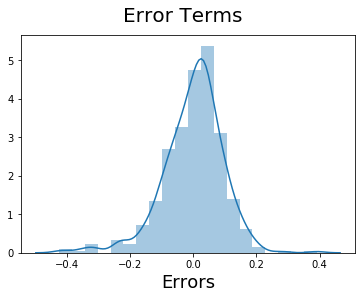

In [94]:
# we have the predicted values from y_train_M8_predict and the actual values from y_train
# So subtracting actual - predicted will give us the residual errors
# These residual errors are to be plotted using Histogram
fig = plt.figure()
sns.distplot((y_train - y_train_M8_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

As the Histogram is normally distributed, our assumption that error terms are noramally distributed holds good

### Make Predictions Using the Final Linear Regression Model

In [95]:
# Apply scaling on Test dataframe - We use same Min - Max scaler on Test
# We use only Transform function here as fit is done on Train not on test data.
to_scale_variables = ['temp', 'hum', 'windspeed', 'cnt']
bikeshare_test[to_scale_variables] = scaler.transform(bikeshare_test[to_scale_variables])

In [96]:
bikeshare_test.head()

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [97]:
bikeshare_test.describe()

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing test data set into X and Y sets for the model validation

In [98]:
y_test = bikeshare_test.pop('cnt')
X_test = bikeshare_test

In [99]:
# To add constant variable to test dataframe
X_test_M8 = sm.add_constant(X_test)

In [100]:
# To drop the columns which are not there in our final model
X_test_M8 = X_test_M8.drop(['holiday', 'workingday', 'hum', 'windspeed', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], axis = 1)

In [101]:
# To make predictions using Model - 8
y_test_M8_predict = lm_8.predict(X_test_M8)

### Model Evaluation

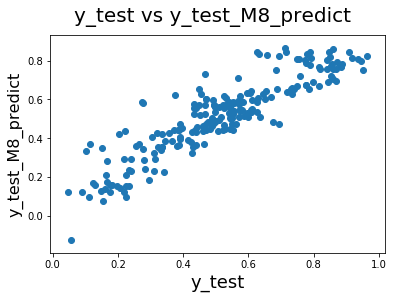

In [102]:
# We will be plotting y_test and y_test_M8_predict values to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_M8_predict)
fig.suptitle('y_test vs y_test_M8_predict', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_M8_predict', fontsize = 16)
plt.show()


The equation for the best fitted line will be :

$ cnt = 0.2335*yr_2019 + 0.4915*temp + 0.0512*summer + 0.0943*winter + 0.0915*September - 0.0673*spring - 0.2967*Light_Snow - 0.0767*Mist + 0.1390*const $


In [103]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_M8_predict))

0.09579345867075129

###### Checking the R-squared on the test set

In [104]:
r_squared = r2_score(y_test, y_test_M8_predict)
print('r_square_value :',r_squared)

r_square_value : 0.8067958609090392


The R-squared on the train data is 81.7% whereas the R-squared on the test data is 80.67%. So our model works very much well on the test set

### Conclusion

Based on the above model, we can say that temp, yr_2019, summer, Mist, winter, spring, September, Light_Snow are the variables which are very significant in predicting the demand for shared bikes

Below best fitted line helps us to predict the demand for the shared bikes using these variables :

$ cnt = 0.2335*yr_2019 + 0.4915*temp + 0.0512*summer + 0.0943*winter + 0.0915*September - 0.0673*spring - 0.2967*Light_Snow - 0.0767*Mist + 0.1390*const $
